# GANs basics and mode collapse scenario 
* In this example MNIST dataset is taken and GAN(Generative Adversarial Network) is used to create fake MNIST like images
* In GANs Disriminator tries to detect real vs fake images and Generator network tries to fake Discriminator by producting real like images


* GAN network training involves two phases
    * In phase 1: Train disriminator only network with real images labeled as 1 and fake images generated by the generator labeled as 0.
    * In Phase 2: Train Generator only network with generated fake images labeled as 1 
    * By end of the training Generator will eventually learns how to fake Descriminaor and produce real like images
* GAN network can go in to mode collapse scenario by generating only similar/same fake image all the time
* To resolve mode collapse issue, deep convolutional GANs can be used 

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load real image dataset - MNIST

In [283]:
from tensorflow.keras.datasets import mnist

In [284]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [285]:
X_train.shape

(60000, 28, 28)

#### Taking few images since GAN needs lot of resources for training

In [286]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Taking zero labeled images

In [287]:
data = X_train[y_train == 0]

In [288]:
data.shape

(5923, 28, 28)

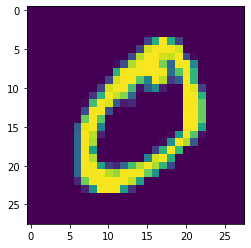

In [289]:
plt.imshow(data[0])

#### Scaling images

In [290]:
data = data/255

In [291]:
img_shape = data[0].shape
img_shape

(28, 28)

In [292]:
img_size = img_shape[0]*img_shape[1]
img_size

784

## GAN

#### Discriminator

In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [294]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = img_shape)) #28x28
discriminator.add(Dense(units = 150, activation = 'tanh', input_shape = img_shape))
discriminator.add(Dense(units = 100, activation = 'relu'))
discriminator.add(Dense(units = 1, activation = 'sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')
discriminator.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_33 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


#### Generator

In [295]:
import tensorflow as tf

In [296]:
codings_size = 100 
tf.random.set_seed(101)
noise = tf.random.normal(shape = [codings_size], mean = 0, stddev = 0.2)
noise

<tf.Tensor: id=6469, shape=(100,), dtype=float32, numpy=
array([ 0.24355476, -0.0220376 ,  0.5868906 ,  0.04899571, -0.2311163 ,
        0.05115891, -0.03325916, -0.00946916,  0.2736301 ,  0.05203286,
       -0.11220749,  0.11995263,  0.06627288, -0.08761721,  0.24267061,
       -0.0608376 , -0.06369888, -0.06148791,  0.13125749,  0.15939894,
       -0.22111097,  0.15120451,  0.049685  ,  0.0215447 , -0.11199417,
       -0.252865  , -0.0989547 ,  0.11989697, -0.3293313 , -0.43103847,
       -0.02969177, -0.07529678, -0.07492594, -0.1685896 , -0.02317479,
        0.00415118, -0.09853046, -0.35513982, -0.6266552 , -0.04752428,
        0.35433212, -0.35575375, -0.15893027,  0.23430286, -0.02540701,
        0.19128221, -0.30563223,  0.13907066,  0.03961727, -0.12109997,
        0.3253381 ,  0.04803174,  0.15530701,  0.19280767, -0.01903612,
       -0.21139205, -0.10757762, -0.24245007,  0.1822878 ,  0.1361318 ,
        0.24442522, -0.3557255 ,  0.267781  , -0.28894663, -0.00968199,
       

In [297]:
from tensorflow.keras.layers import Reshape

In [316]:
generator = Sequential()
generator.add(Dense(units = 100, activation = 'relu', input_shape = [codings_size]))
generator.add(Dense(units = 150, activation = 'relu'))
generator.add(Dense(units = img_size, activation = 'sigmoid')) #784
generator.add(Reshape(img_shape)) #28x28
#generator.compile(loss = 'mse', optimizer = 'adam')

In [318]:
generator.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_40 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


#### GAN model

In [325]:
gan = Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [326]:
gan

In [327]:
gan.layers

In [328]:
gan.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_19 (Sequential)   (None, 28, 28)            143634    
_________________________________________________________________
sequential_16 (Sequential)   (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [329]:
#Generator network
gan.layers[0].summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_40 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [330]:
#Discriminator network
gan.layers[1].summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_33 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


#### Setting up training batches

In [331]:
batch_size = 32

In [332]:
len(data) # number of real images

5923

In [333]:
num_batches = len(data)//batch_size
num_batches

185

In [334]:
import tensorflow as tf

In [335]:
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size = 1000)

In [336]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [337]:
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

#### Real image for discriminator - sample

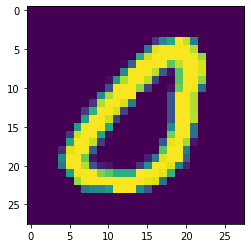

In [338]:
for img_batch in dataset.take(1):
    plt.imshow(img_batch[0])

#### Fake image from generator - sample

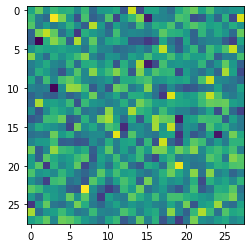

In [339]:
noise = tf.random.normal([batch_size, codings_size])
gen_images = generator(noise)
plt.imshow(gen_images[0])

#### Training GAN

In [363]:
epochs = 2
generator, discriminator = gan.layers
y_labels = []
batch_no= 0

for epoch in range(epochs):
    print(f'Currently on epoch - {epoch+1}')
    
    for real_img_batch in dataset:  #for each batch of real images
        
        batch_no = batch_no + 1
        if(batch_no % 50 == 0):
            print(f'Currently on batch no - {batch_no} of {num_batches}')
            
        #-------- Phase 1 - Discriminator training phase -------------
        #step 1: generate fake imahes from generator
        noise = tf.random.normal([batch_size, codings_size])
        gen_images = generator(noise)
        #Step 2: label fake images as 0
        y_labels = [0]*batch_size
        #step 3: take real images
        #real_img_batch
        #step 4: label real images as 1
        y_labels = y_labels + [1]*batch_size
        #step 5: combine fake and real images
        fake_and_read_images = tf.concat( [gen_images, tf.dtypes.cast(real_img_batch, tf.float32)], axis = 0)
        #step 6 : train discriminator but not generator
        discriminator.trainable = True
        discriminator.train_on_batch(fake_and_read_images, y_labels)
    
        #-------- Phase 2 - Generator training phase ------------------
        #step 1: generate fake images
        noise = tf.random.normal([batch_size, codings_size])
        #step 2: label fake images as 1 to mislead discriminator
        y_labels = [1]*batch_size
        #train 3: train generator but not discriminator
        discriminator.trainable = False
        gan.train_on_batch(noise, y_labels)
    
print('Training complete')

Currently on epoch - 1
Currently on batch no - 50 of 185
Currently on batch no - 100 of 185
Currently on batch no - 150 of 185
Currently on epoch - 2
Currently on batch no - 200 of 185
Currently on batch no - 250 of 185
Currently on batch no - 300 of 185
Currently on batch no - 350 of 185
Training complete


## Try generating real like images from generator

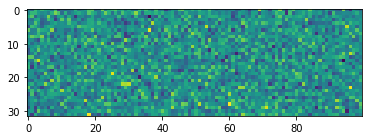

In [364]:
noise = tf.random.normal([batch_size, codings_size])
plt.imshow(noise)

In [365]:
fake_imges = generator(noise)

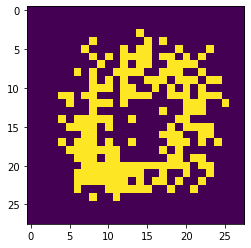

In [366]:
plt.imshow(fake_imges[0])

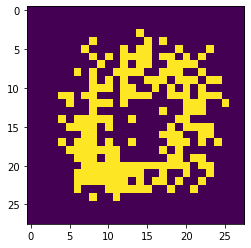

In [367]:
plt.imshow(fake_imges[0])

#### Here we can observe mode-collapse scenario as generator tries to output images which are very similar
* This can be solved using Deep Convolutional GANs or mini-batch discrimination

#### Good Bye !!